the main figure of the paper.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 999
from tang_jcompneuro.model_fitting_postprocess import load_data_generic

In [3]:
cnn_mapping_dict = {
    'b.9': 'R_max',
    'b.2': 'R_max_Q',
    'b.5': 'R_max_HALF',
    'b.9_avg': 'R_avg',
    'b.9_sq': 'S_max',
    'b.9_avg_sq': 'S_avg',
    'b.9_halfsq': 'HS_max',
    'b.9_avg_halfsq': 'HS_avg',
    'b.9_abs': 'A_max',
    'b.9_avg_abs': 'A_avg',
    'b.9_linear': 'L_max',
    'b.9_avg_linear': 'L_avg',
    'b.9_threshold': 'T',
    'b.9_nonthreshold': 'NT',
    'b.9_avgpool': 'AVG',
    'b.9_maxpool': 'MAX',
}


def modelname_alternative(model_type, model_subtype, _1, _2):
    if model_type == 'cnn':
        assert not _2
        if _1:
            suffix = cnn_mapping_dict[model_subtype] + '_all'
        else:
            suffix = cnn_mapping_dict[model_subtype]
    elif model_type == 'glm':
        suffix = model_subtype
    else:
        raise NotImplementedError
    # dollar is later used to find those relevant models.
    return f'{model_type}${suffix}'
    # well, I guess I don't need to be that fancy.
    # just manually doing it should be fine.
    # also more flexible, as I can control order more freely.
#     reutr
    


def check_all(squared, score_col_name):
    models_to_examine = [
        ('cnn', 'b.9'),
#         ('cnn', 'b.9', True),
        # as # of parameter control.
#         ('cnn', 'b.5'),
#         ('cnn', 'b.2'),
        
#         ('cnn', 'b.9_avg', True),
#         ('cnn', 'b.9_abs', True),
#         ('cnn', 'b.9_avg_abs', True),
#         ('cnn', 'b.9_linear', True),
#         ('cnn', 'b.9_avg_linear', True),
#         ('cnn', 'b.9_sq', True),
#         ('cnn', 'b.9_avg_sq', True),
#         ('cnn', 'b.9_halfsq', True),
#         ('cnn', 'b.9_avg_halfsq', True),
        
#         ('cnn', 'b.9_avg'),
#         ('cnn', 'b.9_abs'),
#         ('cnn', 'b.9_avg_abs'),
        ('cnn', 'b.9_linear'),
        ('cnn', 'b.9_avg_linear'),
#         ('cnn', 'b.9_sq'),
#         ('cnn', 'b.9_avg_sq'),
#         ('cnn', 'b.9_halfsq'),
#         ('cnn', 'b.9_avg_halfsq'),
        
        ('cnn', 'b.9_threshold', True, False, ('b.9', 'b.9_halfsq', 'b.9_avg', 'b.9_avg_halfsq')),
        ('cnn', 'b.9_nonthreshold', True, False, ('b.9_abs', 'b.9_sq', 'b.9_avg_abs', 'b.9_avg_sq')),
        
        ('cnn', 'b.9_avgpool', True, False, (
                                         'b.9_avg_abs', 'b.9_avg_sq', 'b.9_avg', 'b.9_avg_halfsq')),
        ('cnn', 'b.9_maxpool', True, False, ('b.9_abs', 'b.9_sq','b.9', 'b.9_halfsq',)),
        
#         ('glm', 'GLM_all', True, False, ('fpower_poisson', 'linear_poisson', 'gqm.2_poisson', 'gqm.4_poisson', 'gqm.8_poisson')),
#         ('glm', 'GLM_all_overfit', True, True, ('fpower_poisson', 'linear_poisson', 'gqm.2_poisson', 'gqm.4_poisson', 'gqm.8_poisson')),
    ]
    
    
    return load_data_generic(models_to_examine, load_naive=False, metric='ccnorm_5', squared=squared,
                            score_col_name=score_col_name, modelname_alternative=modelname_alternative,
#                             datasets_to_check=('MkA_Shape',)
                            )


In [4]:
df_all_cc2 = check_all(squared=True, score_col_name='cc2').xs(100, level='percentage').sort_index()

MkA_Shape all
MkA_Shape OT
MkE2_Shape all
MkE2_Shape OT


In [5]:
df_all_cc2

cc2
dataset    subset model                                                         
MkA_Shape  OT     cnn$AVG_all  {'OT': {'raw': [0.559909091849, 0.696135249034...
                  cnn$L_avg    {'OT': {'raw': [0.170789471451, 0.079667931744...
                  cnn$L_max    {'OT': {'raw': [0.45915600882, 0.528881337833,...
                  cnn$MAX_all  {'OT': {'raw': [0.477342130633, 0.56620089587,...
                  cnn$NT_all   {'OT': {'raw': [0.633303968731, 0.589485895382...
                  cnn$R_max    {'OT': {'raw': [0.414059804323, 0.59491178022,...
                  cnn$T_all    {'OT': {'raw': [0.559909091849, 0.653517449935...
           all    cnn$AVG_all  {'OT': {'raw': [0.514111977198, 0.744804274057...
                  cnn$L_avg    {'OT': {'raw': [0.210599222123, 0.189801868747...
                  cnn$L_max    {'OT': {'raw': [0.489285975339, 0.630266068911...
                  cnn$MAX_all  {'OT': {'raw': [0.540770934067, 0.739229145686...
                  cnn$NT_all   {'OT': {'raw': [0.530918746641, 0.666376512514...
                  cnn$R_max    {'OT': {'raw': [0.497601696912, 0.739229145686...
                  cnn$T_all    {'OT': {'raw': [0.540770934067, 0.73844447981,...
MkE2_Shape OT     cnn$AVG_all  {'OT': {'raw': [0.287161989132, 0.736011630384...
                  cnn$L_avg    {'OT': {'raw': [0.139481322937, 0.342001220361...
                  cnn$L_max    {'OT': {'raw': [0.235204800328, 0.683313128605...
                  cnn$MAX_all  {'OT': {'raw': [0.363849310808, 0.719781170272...
                  cnn$NT_all   {'OT': {'raw': [0.327900995149, 0.740578603026...
                  cnn$R_max    {'OT': {'raw': [0.295561142139, 0.714712339363...
                  cnn$T_all    {'OT': {'raw': [0.341641903043, 0.737405218692...
           all    cnn$AVG_all  {'OT': {'raw': [0.453750365905, 0.747700811801...
                  cnn$L_avg    {'OT': {'raw': [0.127268455704, 0.242445537521...
                  cnn$L_max    {'OT': {'raw': [0.440475874555, 0.718542174041...
                  cnn$MAX_all  {'OT': {'raw': [0.494989380401, 0.725525294728...
                  cnn$NT_all   {'OT': {'raw': [0.42273012155, 0.721907921671,...
                  cnn$R_max    {'OT': {'raw': [0.494991795091, 0.73020746133,...
                  cnn$T_all    {'OT': {'raw': [0.512574724472, 0.747700811801...

In [6]:
# seems that I don't need those small init ones.
# using the default one already looks good enough, in terms of mean performance.
HO_neuron_perf = df_all_cc2.apply(lambda x: x['cc2']['HO']['mean'], axis=1).unstack('subset')
HO_neuron_perf

subset                        OT       all
dataset    model                          
MkA_Shape  cnn$AVG_all  0.247237  0.384903
           cnn$L_avg    0.123801  0.106020
           cnn$L_max    0.218260  0.343374
           cnn$MAX_all  0.232280  0.435683
           cnn$NT_all   0.236542  0.388921
           cnn$R_max    0.232761  0.424384
           cnn$T_all    0.245824  0.436478
MkE2_Shape cnn$AVG_all  0.241244  0.397754
           cnn$L_avg    0.112926  0.099912
           cnn$L_max    0.222119  0.336119
           cnn$MAX_all  0.229048  0.404966
           cnn$NT_all   0.230092  0.376502
           cnn$R_max    0.229838  0.396948
           cnn$T_all    0.239871  0.410651

In [7]:
HO_fail = df_all_cc2.apply(lambda x: np.sum(x['cc2']['HO']['raw']==0), axis=1).unstack('subset')
HO_fail

subset                  OT  all
dataset    model               
MkA_Shape  cnn$AVG_all   0    0
           cnn$L_avg     0    0
           cnn$L_max     0    0
           cnn$MAX_all   0    0
           cnn$NT_all    0    0
           cnn$R_max     0    0
           cnn$T_all     0    0
MkE2_Shape cnn$AVG_all   0    0
           cnn$L_avg     0    0
           cnn$L_max     0    0
           cnn$MAX_all   0    0
           cnn$NT_all    0    0
           cnn$R_max     0    0
           cnn$T_all     0    0

In [8]:
OT_neuron_perf = df_all_cc2.apply(lambda x: x['cc2']['OT']['mean'], axis=1).unstack('subset')
OT_neuron_perf

subset                        OT       all
dataset    model                          
MkA_Shape  cnn$AVG_all  0.503737  0.496795
           cnn$L_avg    0.165644  0.135202
           cnn$L_max    0.436061  0.439460
           cnn$MAX_all  0.479927  0.518083
           cnn$NT_all   0.472732  0.475755
           cnn$R_max    0.473150  0.507491
           cnn$T_all    0.503807  0.520797
MkE2_Shape cnn$AVG_all  0.535950  0.553538
           cnn$L_avg    0.216559  0.175604
           cnn$L_max    0.494230  0.500097
           cnn$MAX_all  0.509730  0.542747
           cnn$NT_all   0.509420  0.528183
           cnn$R_max    0.514725  0.540943
           cnn$T_all    0.531060  0.554000

In [9]:
# so nobody actually fails.
OT_fail = df_all_cc2.apply(lambda x: np.sum(x['cc2']['OT']['raw']==0), axis=1).unstack('subset')
OT_fail

subset                  OT  all
dataset    model               
MkA_Shape  cnn$AVG_all   0    0
           cnn$L_avg     0    0
           cnn$L_max     0    0
           cnn$MAX_all   0    0
           cnn$NT_all    0    0
           cnn$R_max     0    0
           cnn$T_all     0    0
MkE2_Shape cnn$AVG_all   0    0
           cnn$L_avg     0    0
           cnn$L_max     0    0
           cnn$MAX_all   0    0
           cnn$NT_all    0    0
           cnn$R_max     0    0
           cnn$T_all     0    0

In [10]:
import os.path
from tang_jcompneuro import dir_dictionary
from collections import OrderedDict

In [11]:
from tang_jcompneuro.plotting import (image_subset_and_neuron_subset_list,
                                      show_one_decomposed_bar,
                                      show_one_decomposed_scatter,
#                                       show_one_basic
                                     )

In [12]:
from tang_jcompneuro.cell_classification import get_ready_to_use_classification

In [13]:
cell_class_dict_coarse = get_ready_to_use_classification(coarse=True, readonly=True)
cell_class_dict_fine = get_ready_to_use_classification(coarse=False, readonly=True)

In [14]:
def fetch_data_mean(dataset, img_subset, neuron_subset, model_type, model_subtype):
    if neuron_subset == 'OT':
        return OT_neuron_perf.at[(dataset, f'{model_type}${model_subtype}'), img_subset]
    elif neuron_subset == 'HO':
        return HO_neuron_perf.at[(dataset, f'{model_type}${model_subtype}'), img_subset]
    else:
        raise NotImplementedError
        
        
def fetch_data_raw(dataset, img_subset, neuron_subset, model_type, model_subtype):
    return df_all_cc2.at[(dataset, img_subset, f'{model_type}${model_subtype}'), 'cc2'][neuron_subset]['raw']

def get_local_index_mask(dataset, neuron_subset):
    coarse_mask = cell_class_dict_coarse[dataset][neuron_subset]
    fine_this = cell_class_dict_fine[dataset][neuron_subset]
    result = []
    sum_now = 0
    mask_start = np.zeros((coarse_mask.sum(),), dtype=np.bool_)
    for v in fine_this.values():
        assert v.shape == coarse_mask.shape
        assert v.dtype == coarse_mask.dtype == np.bool_
        value_to_add = v[coarse_mask]
        sum_now += value_to_add.sum()
        result.append(value_to_add)
        assert mask_start.shape == value_to_add.shape
        mask_start = np.logical_or(mask_start, value_to_add)
    assert coarse_mask.sum() == sum_now
    assert np.array_equal(mask_start, np.ones((coarse_mask.sum(),), dtype=np.bool_))
    # again, check that this mask is a good one.
    return result

In [15]:
# ok. time to work on plots.
# # https://github.com/leelabcnbc/tang_jcompneuro/blob/master/thesis_plots/v1_fitting/comparison_among_all_non_vgg_models_decomposed_by_fine_subsets.ipynb
def draw_one_stuff(dataset, save=None, letter_bias=0):
    
    models_to_work_on =   [('cnn', x) for x in ('R_max',
                                              'L_avg', 'L_max',
                                                'NT_all', 'T_all', 'AVG_all', 'MAX_all')]
    models_to_work_on = models_to_work_on[::-1]
    assert len(set([x[1] for x in models_to_work_on])) == len(models_to_work_on)
    
    
#     model_pairs_to_check = [
# #         ('GLM_all', 'S_avg'),
#         # two T vs NT
#         ('HS_avg', 'S_avg'),
#         ('HS_max', 'S_max'),
#         ('R_max', 'S_max'),
#         ('R_avg', 'S_avg'),
#         ('R_avg', 'A_avg'),
#         ('R_max', 'A_max'),
# #         ('A_avg', 'S_avg'),
# #         ('A_max', 'S_max'),
# #         ('A_avg', 'A_max'),
#         ('L_avg', 'L_max'),
#         # two HS vs R
#         ('HS_max', 'R_max'),
#         ('HS_avg', 'R_avg'),
# #         ('A_max', 'R_max_HALF'), # in case all things are just due to expressiveness.
#         # in this case.
# #         ('A_max', 'R_max_Q'), # in case all things are just due to expressiveness.
#     ]
    
#     model_pairs_to_check = [
#         ('glm_all', 'S_avg_ALL'),
#         ('HS_avg_ALL', 'S_avg_ALL'),
#         ('A_avg_ALL', 'S_avg_ALL'),
#         ('A_max_ALL', 'S_max_ALL'),
#         ('A_avg_ALL', 'A_max_ALL'),
#     ]
    
    
#     spotlight_items = [('HS_max', 'S_max', 'OT', 'all'),  # seems to prove my point best, averaged over two monkeys.
#                        ('HS_max', 'S_max', 'HO', 'all'),
#                        ('HS_max', 'R_max', 'HO', 'all'),
#                       ]
#     spotlight_work_count = 0
#     assert len(spotlight_items) == 3
    
    
    
    
    
    
    monkey = {'MkA_Shape': 'A', 'MkE2_Shape': 'B'}[dataset]
    
    
    
    
    
    
    
    
    
    
    # draw one by one.
    num_panel = len(image_subset_and_neuron_subset_list)
    
    plt.close('all')
    fig, axes = plt.subplots(1, num_panel, sharex=False, sharey=True, squeeze=False,
                            figsize=(5.5,3.5))
    
    
#     fig_explore, axes_explore = plt.subplots(len(model_pairs_to_check), num_panel, sharex=True, sharey=True,
#                                             squeeze=False, figsize=(5.5,5.5/3*len(model_pairs_to_check)))
    
    
#     fig_sl, axes_sl = plt.subplots(1, len(spotlight_items), sharex=True, sharey=True,
#                                             squeeze=False, figsize=(5.5,5.5/3))
    
#     assert axes_explore.shape == (len(model_pairs_to_check), num_panel)
    
    
    
    for idx, (ax, (img_subset, neuron_subset)) in enumerate(zip(axes.ravel(), image_subset_and_neuron_subset_list)):
#         data_x = df_all_cc2.at[('MkA_Shape', img_subset, model_name_x_real), 'cc2'][neuron_subset]['raw']
#         data_y = df_all_cc2.at[('MkA_Shape', img_subset, model_name_y_real), 'cc2'][neuron_subset]['raw']
#         show_one_basic(data_x, data_y, title=f'{neuron_subset} neurons\n{img_subset} stimuli',
#                       ax=ax,mean_title='mean $CC_\mathrm{norm}^2$', xlabel=model_name_x,
#                       ylabel=model_name_y  if idx == 0 else None)
        print(img_subset, neuron_subset)
        color_bias = {'HO': 0, 'OT': 5}[neuron_subset]
        # gather data.
        # for each model, collect subsets in chunks.
        # and divide data by fine subsets
        stat_raw_array = [fetch_data_raw(dataset, img_subset, neuron_subset, x, y) for x, y in models_to_work_on]
        stat_mean_ref_array = np.asarray([fetch_data_mean(dataset, img_subset, neuron_subset, x, y) for x, y in models_to_work_on])
        stat_chunks_array = []
        raw_chunks_array = []
        
        
        local_index_mask_all = get_local_index_mask(dataset, neuron_subset)
        
        for mask_this in local_index_mask_all:
            stat_chunks_array.append([x[mask_this].sum()/mask_this.size for x in stat_raw_array])
            
            
            raw_chunks_array.append(np.asarray([x[mask_this] for x in stat_raw_array]))
            
        stat_chunks_array = np.asarray(stat_chunks_array)
        assert stat_chunks_array.shape == (len(local_index_mask_all), len(models_to_work_on))
#         print(stat_chunks_array)
        stat_mean_ref_array_debug = stat_chunks_array.sum(axis=0)
        assert stat_mean_ref_array_debug.shape == stat_mean_ref_array.shape
        assert np.allclose(stat_mean_ref_array_debug, stat_mean_ref_array)
        stat_name_array = [x[1] for x in models_to_work_on]
#         print(stat_name_array)
        
        
        
            
#         ok. pass into my fancy function and draw!
        show_one_decomposed_bar(stat_chunks_array, stat_name_array,
                                ax=ax,
                                xlabel='mean $CC_\mathrm{norm}^2$',
                                title=f'{neuron_subset} neurons\n{img_subset} stimuli',
                               color_bias=color_bias, set_ylabel=True if idx==0 else False,
                               ylabel_styles=['italic']*4 + [None]*2 + ['bold'],
                               letter_map=idx+letter_bias,color_list=[['black', '#AAAAAA', 'blue',
                                                                      '#BFBFFF', '#00FF00', '#BFFFBF', 'red']]*7,
                               height=0.8)
    
    
   
    # save space
#     fig.suptitle(f'CNN variants on monkey {monkey}')
    # adjust figure 
    fig.subplots_adjust(top=0.85, bottom=0.15, left=0.15, right=0.99, hspace=0.05, wspace=0.1)
    
    
#     fig_explore.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.0, wspace=0.0)
#     fig_sl.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.0, wspace=0.0)
    if save is not None:
        save_dir = os.path.join(dir_dictionary['plots'], 'main', 'cnn_detailed_for_slides')
        os.makedirs(save_dir, exist_ok=True)
        fig.savefig(os.path.join(save_dir, f'{save}_bars.pdf'), dpi=300, transparent=True)
#         fig_explore.savefig(os.path.join(save_dir, f'{save}_explore.pdf'), dpi=300)
#         fig_sl.savefig(os.path.join(save_dir, f'{save}_spotlight.pdf'), dpi=300)
    
    plt.show()

OT OT
all OT
all HO


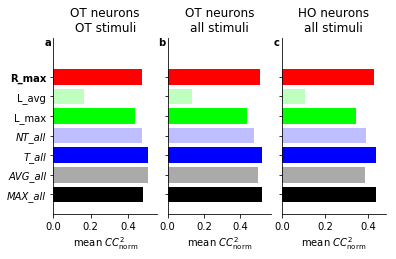

In [16]:
draw_one_stuff('MkA_Shape', 'A')

OT OT
all OT
all HO


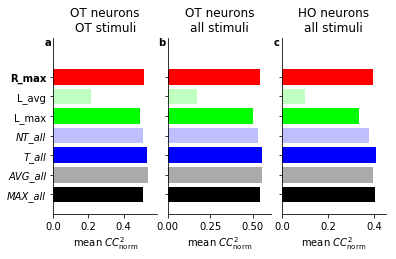

In [17]:
draw_one_stuff('MkE2_Shape', 'E2')